# Documenation For Plotting Commands

This notebook contains (i) the API, and (ii) code examples, for the dot-commands in `iventure`, such as `.scatter` and `.histogram`. All the dot commands accept a SQL table, and the documentation has the following form:

```
[dot-command-name] [column-1] ... [column-k]
```

In [44]:
%load_ext iventure.magics
%matplotlib inline
%bayesdb resources/satellites.mpl.bdb

The iventure.magics extension is already loaded. To reload it, use:
  %reload_ext iventure.magics


u'Loaded: resources/satellites.mpl.bdb'

In [45]:
%bql CREATE TABLE satellites FROM 'resources/satellites.csv'
%bql .nullify satellites 'NaN'

Nullified 3032 cells


### .bar category height
Accepts a table with two columns, and produces a bar plot.

- The first column `category` is a unique nominal value. Duplicate values in the first column return an error.
- The second column `height` is the real-valued height of the bar for that value.

,type_of_orbit,AVG(perigee_km)
0,Cislunar,186.000000
1,Deep Highly Eccentric,10959.555556
2,Intermediate,1131.986395
3,Molniya,821.454545
4,Polar,751.460674
5,Retrograde,367.000000
6,Sun-Synchronous,800.179389


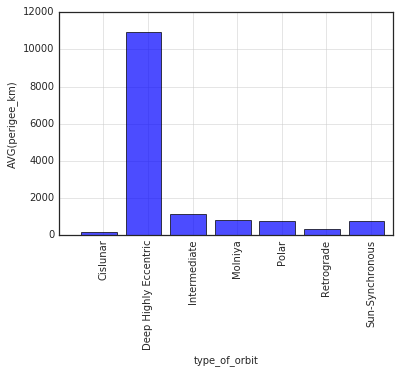

In [46]:
%%sql
CREATE TABLE IF NOT EXISTS table_bar AS
    SELECT type_of_orbit, AVG(perigee_km)
    FROM satellites
    WHERE type_of_orbit IS NOT NULL
    GROUP BY type_of_orbit;

.bar SELECT * FROM table_bar;
SELECT * FROM table_bar;

### .scatter x1, x2, [label]
Accepts a table with two or three columns, and produces a scatter plot.

- The first column `x1` is the first real-valued coordinate of a row.
- The second column `x2` is the second real-valued coordinate of a row.
- [Optional] The third column `label` is a nominal label indicating the series to which the row belongs. This column is used to determine the color of a datapointmand its label in the legend.

In [47]:
%%sql
CREATE TABLE IF NOT EXISTS table_scatter AS
    SELECT apogee_km, perigee_km, class_of_orbit
    FROM satellites;
SELECT * FROM table_scatter LIMIT 5;

,apogee_km,perigee_km,class_of_orbit
0,787,770,LEO
1,35794,35777,GEO
2,35789,35785,GEO
3,35793,35780,GEO
4,35791,35780,GEO


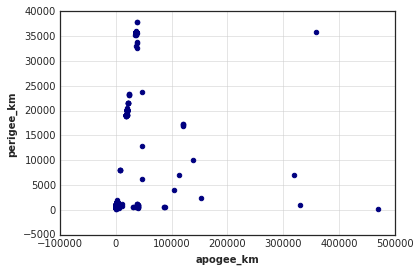

In [48]:
%sql .scatter SELECT apogee_km, perigee_km FROM table_scatter;

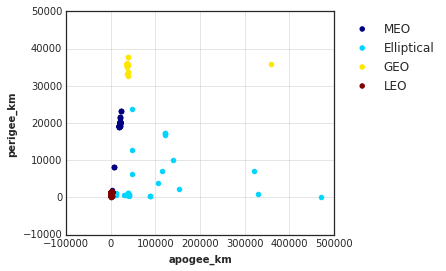

In [49]:
%sql .scatter SELECT apogee_km, perigee_km, class_of_orbit FROM table_scatter;

### .histogram_numerical x1, [label]
Accepts a table with one or two columns, and produces a histogram. This command is used for real valued data.

- The first column `x1` is the real-valued coordinate of a row.
- [Optional] The second column `label` is a nominal label indicating the series to which the row belongs. This column is used to determine the color of a datapointmand its label in the legend.

In [50]:
%%sql
CREATE TABLE IF NOT EXISTS table_histogram AS
    SELECT dry_mass_kg, class_of_orbit
    FROM satellites
    WHERE dry_mass_kg IS NOT NULL;
SELECT * FROM table_histogram LIMIT 5;

,dry_mass_kg,class_of_orbit
0,1730,GEO
1,800,GEO
2,1700,GEO
3,1800,GEO
4,13,LEO


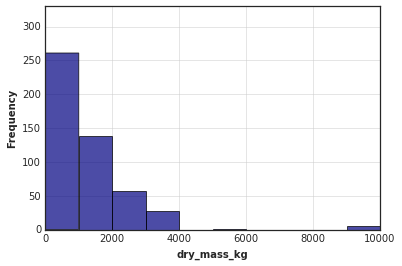

In [51]:
%sql .histogram_numerical SELECT dry_mass_kg FROM table_histogram;

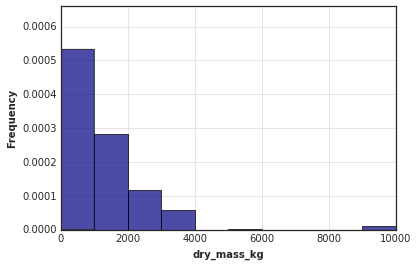

In [52]:
%sql .histogram_numerical --normed=True SELECT dry_mass_kg FROM table_histogram;

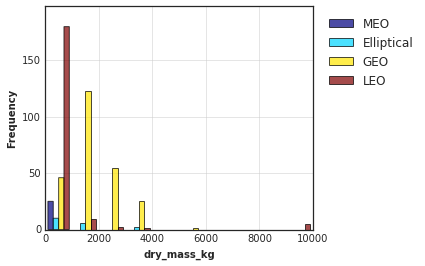

In [53]:
%sql .histogram_numerical SELECT dry_mass_kg, class_of_orbit FROM table_histogram;

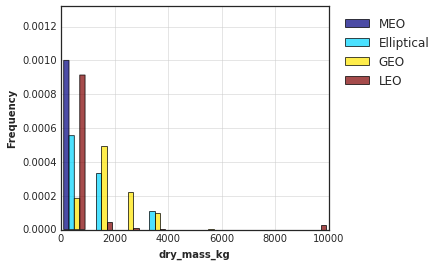

In [54]:
%sql .histogram_numerical --normed=True SELECT dry_mass_kg, class_of_orbit FROM table_histogram;

### .histogram_nominal x1, [label]
Accepts a table with one or two columns, and produces a histogram. This command is used for nominal value data.

- The first column `x1` is the nominal-valued coordinate of a row.
- [Optional] The second column `label` is a nominal label indicating the series to which the row belongs. This column is used to determine the color of a datapointmand its label in the legend.

In [55]:
%%sql
CREATE TABLE IF NOT EXISTS table_hist AS
    SELECT type_of_orbit, class_of_orbit
    FROM satellites
    WHERE type_of_orbit IS NOT NULL;
SELECT * FROM table_hist LIMIT 5;

,type_of_orbit,class_of_orbit
0,Sun-Synchronous,LEO
1,Sun-Synchronous,LEO
2,Sun-Synchronous,LEO
3,Sun-Synchronous,LEO
4,Sun-Synchronous,LEO


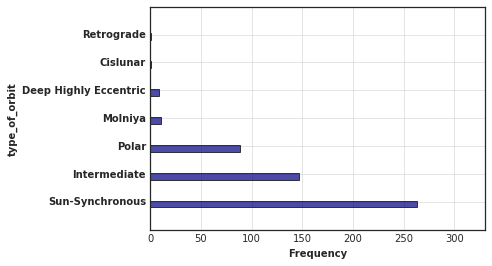

In [56]:
%sql .histogram_nominal SELECT type_of_orbit FROM table_hist

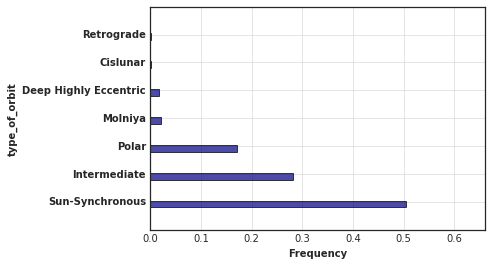

In [57]:
%sql .histogram_nominal --normed=True SELECT type_of_orbit FROM table_hist;

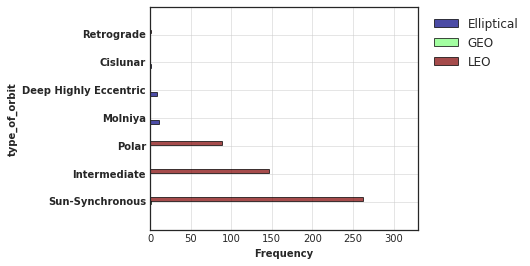

In [58]:
%sql .histogram_nominal SELECT type_of_orbit, class_of_orbit FROM table_hist;

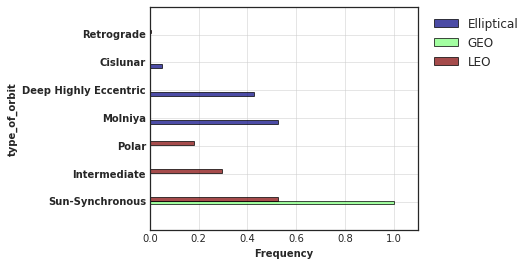

In [59]:
%sql .histogram_nominal --normed=True SELECT type_of_orbit, class_of_orbit FROM table_hist;

### .clustermap name0, name1, value
Accepts a table with three columns (ie a "tidy" dataframe), and produces a clustermap of the values.

- The first column `name0` is the nominal-valued series of the first variable.
- The second column `name1` is the nominal-valued series of the second variable.
- The thire column `value` is the value for the cell `name0`, `name1` in the clustermap.

This table is typically returned from an `ESTIMATE ... FROM PAIRWISE VARIABLES OF` query in BQL.

In [60]:
%sql DROP TABLE IF EXISTS dummy_pairwise;

""


In [61]:
%%sql
CREATE TABLE dummy_pairwise AS
    SELECT 'f' AS "name0", 'f' AS "name1", 1 AS "value"
    UNION ALL
    SELECT 'f', 'b', .2
    UNION ALL
    SELECT 'f', 'c', .3
    UNION ALL
    SELECT 'b', 'f', .2
    UNION ALL
    SELECT 'b', 'b', 1
    UNION ALL
    SELECT 'b', 'c', .7

""


In [62]:
%sql SELECT * FROM dummy_pairwise;

,name0,name1,value
0,f,f,1.0
1,f,b,0.2
2,f,c,0.3
3,b,f,0.2
4,b,b,1.0
5,b,c,0.7


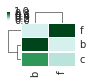

In [63]:
%bql .clustermap --figsize=(10,10) SELECT name1, name0, value FROM dummy_pairwise;

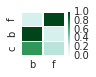

In [64]:
%bql .heatmap SELECT name1, name0, value FROM dummy_pairwise;